# Part I - (Prosper Loan Data)
## by (Arinze Nchor)

## Introduction
- This is my final project on Udacity Data Analyst Nanodegree.

- This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# read the data set in to data frame
df_loan = pd.read_csv('prosperLoanData.csv')

df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df_loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [4]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
df_loan.shape

(113937, 81)

### From the data info, there are 80 columns, which is a lot. I'll narrow them doen to the columns i'll be needing below

In [6]:
columns = ['Term', 'ListingNumber', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'Occupation', 'BorrowerState', 'EmploymentStatus', 'IncomeRange', 'IsBorrowerHomeowner', 'LoanOriginalAmount', 'LoanOriginationDate']


df_loanData = df_loan[columns]



In [7]:
# Loading the loanData

df_loanData.head()

,Term,ListingNumber,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),Occupation,BorrowerState,EmploymentStatus,IncomeRange,IsBorrowerHomeowner,LoanOriginalAmount,LoanOriginationDate
0,36,193129,Completed,0.16516,0.1580,NaN,NaN,0,Other,CO,Self-employed,"$25,000-49,999",True,9425,2007-09-12 00:00:00
1,36,1209647,Current,0.12016,0.0920,A,7.0,2,Professional,CO,Employed,"$50,000-74,999",False,10000,2014-03-03 00:00:00
2,36,81716,Completed,0.28269,0.2750,NaN,NaN,0,Other,GA,Not available,Not displayed,False,3001,2007-01-17 00:00:00
3,36,658116,Current,0.12528,0.0974,A,9.0,16,Skilled Labor,GA,Employed,"$25,000-49,999",True,10000,2012-11-01 00:00:00
4,36,909464,Current,0.24614,0.2085,D,4.0,2,Executive,MN,Employed,"$100,000+",True,15000,2013-09-20 00:00:00


In [8]:
# Making a copy of the dataset

df_loanData_copy = df_loanData.copy()

In [9]:
df_loanData_copy

,Term,ListingNumber,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),Occupation,BorrowerState,EmploymentStatus,IncomeRange,IsBorrowerHomeowner,LoanOriginalAmount,LoanOriginationDate
0,36,193129,Completed,0.16516,0.1580,NaN,NaN,0,Other,CO,Self-employed,"$25,000-49,999",True,9425,2007-09-12 00:00:00
1,36,1209647,Current,0.12016,0.0920,A,7.0,2,Professional,CO,Employed,"$50,000-74,999",False,10000,2014-03-03 00:00:00
2,36,81716,Completed,0.28269,0.2750,NaN,NaN,0,Other,GA,Not available,Not displayed,False,3001,2007-01-17 00:00:00
3,36,658116,Current,0.12528,0.0974,A,9.0,16,Skilled Labor,GA,Employed,"$25,000-49,999",True,10000,2012-11-01 00:00:00
4,36,909464,Current,0.24614,0.2085,D,4.0,2,Executive,MN,Employed,"$100,000+",True,15000,2013-09-20 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,36,753087,Current,0.22354,0.1864,C,5.0,1,Food Service Management,IL,Employed,"$50,000-74,999",True,10000,2013-04-22 00:00:00
113933,36,537216,FinalPaymentInProgress,0.13220,0.1110,A,8.0,7,Professional,PA,Employed,"$75,000-99,999",True,2000,2011-11-07 00:00:00
113934,60,1069178,Current,0.23984,0.2150,D,3.0,1,Other,TX,Employed,"$25,000-49,999",True,10000,2013-12-23 00:00:00
113935,60,539056,Completed,0.28408,0.2605,C,5.0,2,Food Service,GA,Full-time,"$25,000-49,999",True,15000,2011-11-21 00:00:00


In [10]:
# Checking for null values form the data set

df_loanData_copy[['BorrowerAPR','BorrowerRate','LoanOriginalAmount']].isnull().value_counts()

BorrowerAPR  BorrowerRate  LoanOriginalAmount
False        False         False                 113912
True         False         False                     25
dtype: int64

In [11]:
# Converting loan origination date to date type data

df_loanData_copy['LoanOriginationDate']=df_loanData_copy.loc[:,'LoanOriginationDate'].apply(pd.to_datetime, errors='coerce')

In [12]:
# renaming the coulmn names

df_loanData_copy=df_loanData_copy.rename(columns={"ProsperRating (Alpha)":"ProsperRating","ListingCategory (numeric)":"ListingCategory"})



### What is the structure of your dataset?


#### The main data set contain 113937 row and 81 columns. But for my analysis i would be working with 113937 row and 15 column as I dropped some irrelevant columns which inclues:

- ListingNumber: The number that uniquely identifies the listing to the public as displayed on the website.
- Term: The length of the loan expressed in months.
- LoanStatus: The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
- BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
- BorrowerRate: The Borrower's interest rate for this loan.
- ProsperRating: The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.
- ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009.
- BorrowerState: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
- Occupation: The Occupation selected by the Borrower at the time they created the listing.
- EmploymentStatus:The employment status of the borrower at the time they posted the listing.
- IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
- IncomeRange: The income range of the borrower at the time the listing was created.
- LoanOriginalAmount: The origination amount of the loan.
- LoanOriginationDate: The date the loan was originated.
- Listing_category: The category of the listing that the borrower selected when posting their listing

### What is/are the main feature(s) of interest in your dataset?

- BorrowerAPR
- BorrowerRate
- ProsperRating although it only for data set after july 2019

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- EmploymentStatus
- LoanOriginalAmount
- IncomeRange
- IsBorrowerHomeowner

## Univariate Exploration



In [13]:
# Creating a fuction for ploting my histigram for univariate plots.
def hist_plot(df,x_value,bin):
    '''
    The function accept 3 varables.
    
    df: the data frame
    
    x_value: the x value to plot
    
    bin: the bin size one need for ploting
    
    '''
    # setting the fig size for ploting
    plt.figure(figsize = [15, 5])
    # ploting the function with .hist
    plt.hist(data = df, x = x_value, bins = bin);
    # srtting the title for the data set
    plt.title(f'''{x_value} distribution'''.title(),fontsize=13,weight=("bold"))
    # setting the y label
    plt.ylabel('Count'.title(),fontsize=10,weight=("bold"))
    # setting the x label
    plt.xlabel(x_value.title(),fontsize=10,weight=("bold"))

In [14]:
df_loanData_copy.describe()

,Term,ListingNumber,BorrowerAPR,BorrowerRate,ProsperScore,ListingCategory,LoanOriginalAmount
count,113937.000000,1.139370e+05,113912.000000,113937.000000,84853.000000,113937.000000,113937.00000
mean,40.830248,6.278857e+05,0.218828,0.192764,5.950067,2.774209,8337.01385
std,10.436212,3.280762e+05,0.080364,0.074818,2.376501,3.996797,6245.80058
min,12.000000,4.000000e+00,0.006530,0.000000,1.000000,0.000000,1000.00000
25%,36.000000,4.009190e+05,0.156290,0.134000,4.000000,1.000000,4000.00000
50%,36.000000,6.005540e+05,0.209760,0.184000,6.000000,1.000000,6500.00000
75%,36.000000,8.926340e+05,0.283810,0.250000,8.000000,3.000000,12000.00000
max,60.000000,1.255725e+06,0.512290,0.497500,11.000000,20.000000,35000.00000


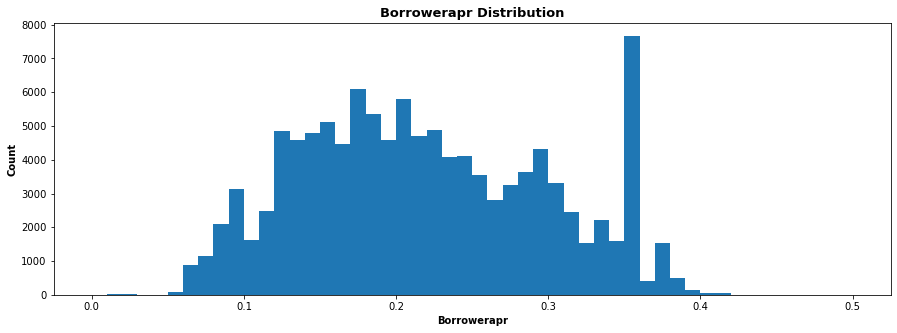

In [15]:
# plotting the borrower rate with my function
hist_plot(df_loanData_copy, 'BorrowerAPR', bin = np.arange(0, 0.5+0.01, 0.01))

- The plot shows that the 'BorrowerAPR' is a multimodal plot. With the first peak around 0.1, a gradual increase towards 2.0 which is in between the second and third peaks, and decreases towards the fourth peak in 0.3. A spike occurred towards 0.4 having the largest count of about 8,000. The borrower's APR % rate is distributed just around 0.1 and 0.4.


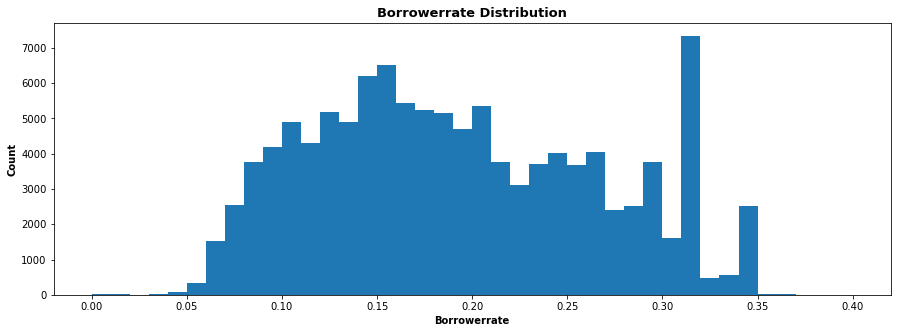

In [16]:
# using my function to plot my borrower rate distribution 
hist_plot(df_loanData_copy, 'BorrowerRate', bin = np.arange(0, 0.4+0.01, 0.01))

- The BorrowerRate plot shows almost the same distribution as the Borrower APR, with it highest peak slightly above 0.3 of about 7000 count this what i expected since the BorrowerRate and other due rate when added make up the Borrower APR.


In [17]:
np.log10(df_loanData_copy['LoanOriginalAmount'].describe())

count    5.056665
mean     3.921011
std      3.795588
min      3.000000
25%      3.602060
50%      3.812913
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

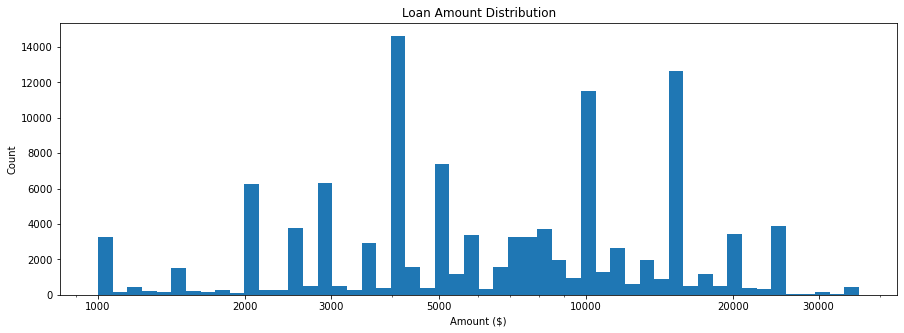

In [18]:
bins = 10 ** np.arange(3, np.log10(df_loanData_copy['LoanOriginalAmount'].max())+0.03, 0.03)
# setting fig size
plt.figure(figsize = [15, 5])
plt.hist(data = df_loanData_copy, x = 'LoanOriginalAmount', bins = bins);
ticks = [1000,2000,3000,5000,10000,20000,30000]
# setting the labels
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xlabel('Amount ($)')
plt.ylabel('Count')
plt.title('Loan Amount Distribution')
plt.xticks(ticks, labels);


- The loan amount distribution is multimodal and starts from 1000, with its highest peak at about 5000.
- This shows that the amount the borrowers collected is widely distributed, between 1000 and slight above 30000 dollars

In [19]:
# creating a fuction for ploting my count plot with x variable.
def count_xplot(df,x_value,color= sb.color_palette()[0],order=None):
    '''
    The function accept 3 varables.
    
    df: the data frame
    
    x_value: the x value to plot
    
    order: order of the value
    
    '''
    # setting the fig size for ploting
    plt.figure(figsize = [15, 5])
    # ploting the function with .hist
    sb.countplot(data = df, x = x_value, edgecolor='black',color=color,order=order );
    # setting the title for the data set
    plt.title(f'''{x_value} distribution'''.title(),fontsize=13,)
    # setting the y label
    plt.ylabel('Count'.title(),fontsize=10,)
    # setting the x label
    plt.xlabel(x_value.title(),fontsize=10,)

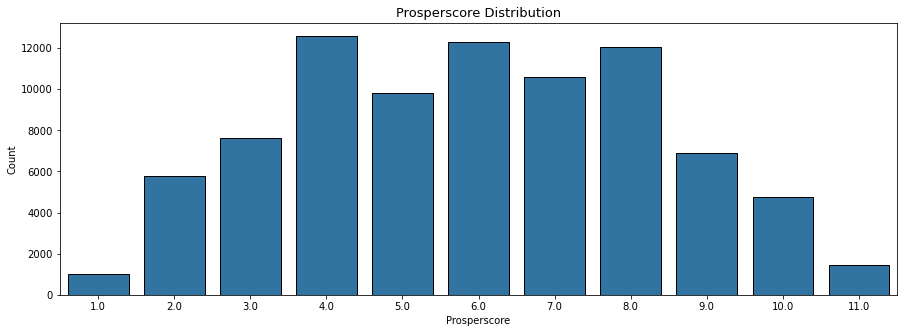

In [20]:
# using the function count xplot 
count_xplot(df_loanData_copy,'ProsperScore')

- The prosper Score distrbution showed that it is multimodal, with score 4 having the highest count of about 1200,followed by 6 and 8. the lowest count score is 1. showing that more individuals where giving a good prosper score rating.

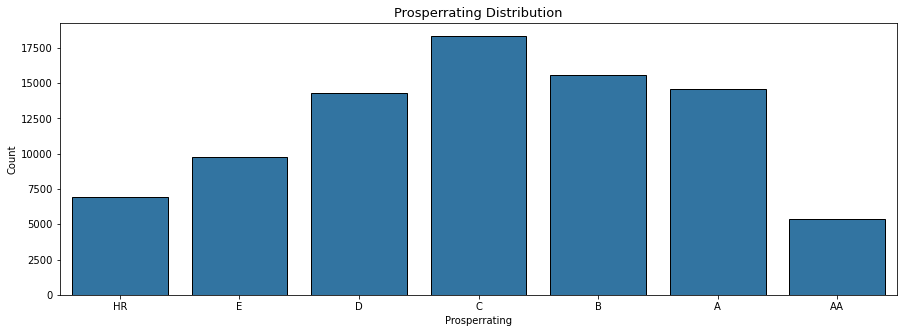

In [21]:
# seting the rating prosper rating order
rating=['HR','E','D','C','B','A','AA']
# ordering it into a categorical type data
rate_set = pd.api.types.CategoricalDtype(ordered=True, categories=rating)
# setting it into the prosper rating
df_loanData_copy['ProsperRating'] = df_loanData_copy['ProsperRating'].astype(rate_set);
# ploting a distribution count plot for it
count_xplot(df_loanData_copy,'ProsperRating')

- The prosper rating has a steady increase from HR with slightly below 7500 towards C, which is the peak of the distribution with about 17500 counts. B and A between 15000 and 12500 count while decreasing towards AA.

- The proser distribution shows that individuals with the highest rating are the least in the population.

In [22]:
# creating a fuction for ploting my count plot with x variable.
def count_yplot(df,y_value,color= sb.color_palette()[0],order=None):
    '''
    The function accept 3 varables.
    
    df: the data frame
    
    x_value: the x value to plot
    
    order: order of the value
    
    '''
    # setting the fig size for ploting
    plt.figure(figsize = [15, 5])
    # ploting the function with .hist
    sb.countplot(data = df, y = y_value, edgecolor='black',color=color,order=order );
    # srtting the title for the data set
    plt.title(f'''{y_value} distribution'''.title(),fontsize=13,)
    # setting the y label
    plt.xlabel('Count'.title(),fontsize=10,)
    # setting the x label
    plt.ylabel(y_value.title(),fontsize=10,)

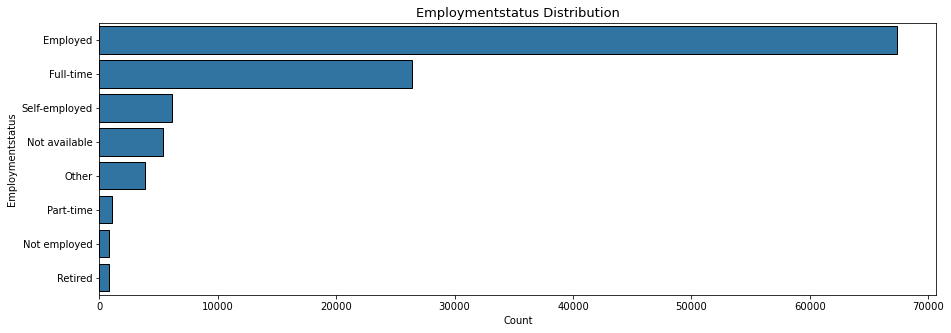

In [23]:
# creating an order for the plot 
orders_plot = df_loanData_copy.EmploymentStatus.value_counts().index

# using the y function to plot the distribution
count_yplot(df_loanData_copy, 'EmploymentStatus', order = orders_plot)

- From the employment status distribution, one could see that majority of individuals that applied for the loans are employed and about 70000, while the least individuals are retired

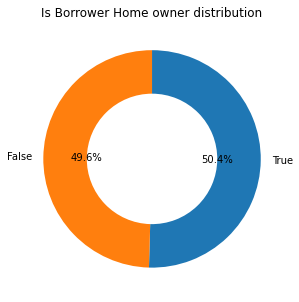

In [24]:
# getting a doughnut plot for the homeowner distribution
counts = df_loanData_copy.IsBorrowerHomeowner.value_counts()

# setting the fig size for ploting
plt.figure(figsize = [15, 5])
plt.pie(counts, labels = counts.index,autopct='%1.1f%%', startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.title("Is Borrower Home owner distribution");


- The Borrower Homeowner plot shows an almost even distribution between borrowers who have a home and do not.
- This implies that home ownership might not have a significant effect on getting a loan.

In [25]:
# To get the top 20 occupations of the borrowers
df_loanData_copy.Occupation.value_counts()[:20]

Other                                28617
Professional                         13628
Computer Programmer                   4478
Executive                             4311
Teacher                               3759
Administrative Assistant              3688
Analyst                               3602
Sales - Commission                    3446
Accountant/CPA                        3233
Clerical                              3164
Sales - Retail                        2797
Skilled Labor                         2746
Retail Management                     2602
Nurse (RN)                            2489
Construction                          1790
Truck Driver                          1675
Laborer                               1595
Police Officer/Correction Officer     1578
Civil Service                         1457
Engineer - Mechanical                 1406
Name: Occupation, dtype: int64

- From the look of things, several borrowers did not fill in their occupations, and the data available here is not enough to make a valid conclusion on the highest number of occupations receiving loans.

In [26]:
df_loanData_copy['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

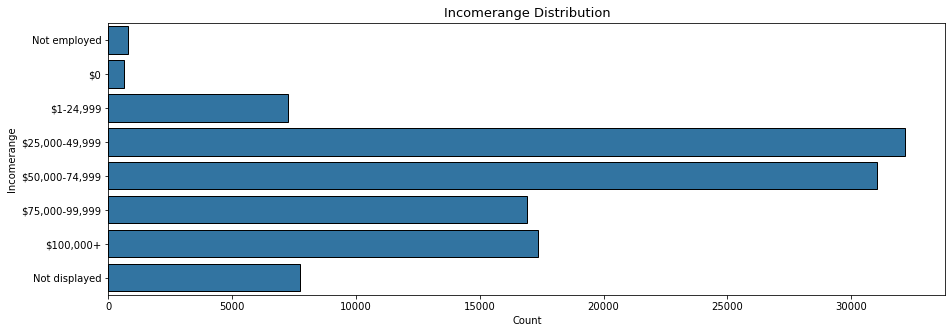

In [27]:
# creating an order for the plot IncomeRange 
income_orders = ['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed']


# using the function count_yplot for ploting
count_yplot(df_loanData_copy,'IncomeRange',order = income_orders)


- From the chart, it shows that large numbers of the borrowers are of the income range 25,000 - 74,999 range

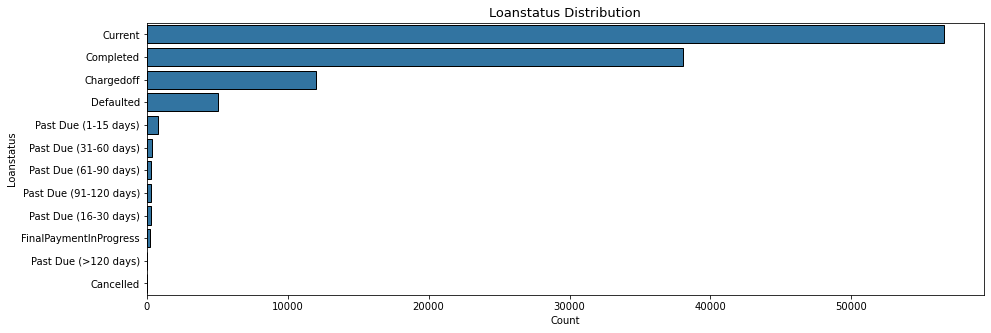

In [28]:
# creating an order for the plot IncomeRange 
orders = df_loanData_copy.LoanStatus.value_counts().index


# using count plot for the Loan status distribution
count_yplot(df_loanData_copy, 'LoanStatus', order = orders)

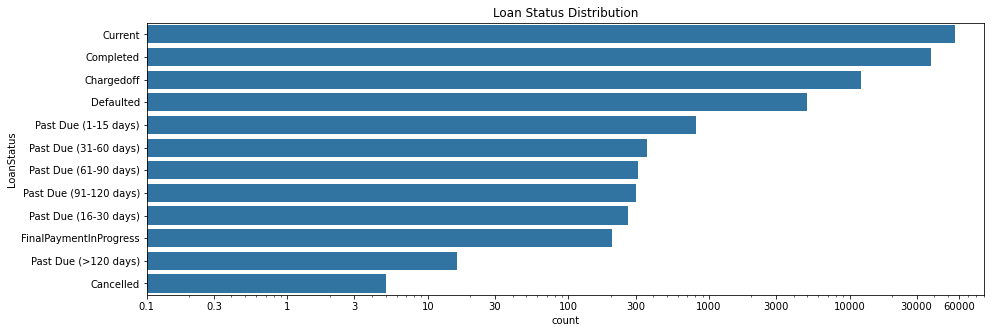

In [29]:
# ploting the fig size using a log scale to make my plot more distributed
plt.figure(figsize=[15,5])
colour= sb.color_palette()[0]
# creating an order for the plot LoanStatus 
orders = df_loanData_copy.LoanStatus.value_counts().index
# creating tick marks
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000,3000,10000,30000,60000]
# setting the labels
labels = ['{}'.format(v) for v in ticks]
# using count plot for the IncomeRange status distribution
sb.countplot(data= df_loanData_copy, y= 'LoanStatus', color = colour, order = orders);
plt.title("Loan Status Distribution");
# using a log scale to show 
plt.xscale('log');
plt.xticks(ticks, labels);

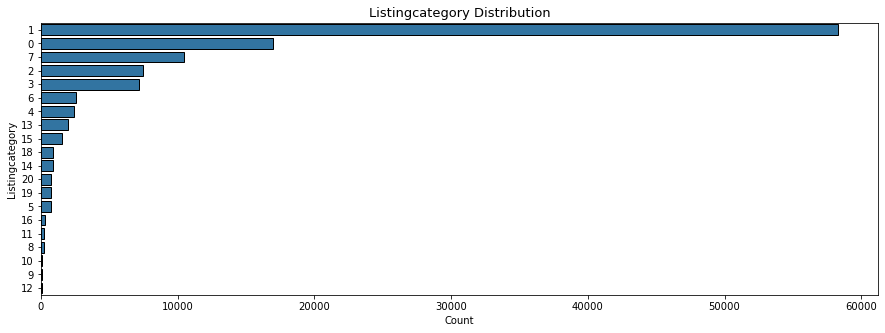

In [30]:
orders= df_loanData_copy.ListingCategory.value_counts()[:20].index


# plotting for the reason for getting loans
count_yplot(df_loanData_copy,'ListingCategory',order=orders)

- The distributon shows that a very large amount about 60000 get the loans for debt consolidation


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The BorrowerAPR is multimodal with an unusual spike around about 0.4 percent, i have to use the log transformation to get a better insight into the plot. Also, the Borrowerintrest had a similar trend with the BorrowerAPR, which I think is normal because the interest rate plus other expense fees like mortgage make up the BorrowerAPR.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- Most of the distributions were normal, I had to use a log function in my scaling to stop the distribution from being skewed to a particular side, also I change the listing category from number to it variable using loops for better representation of the data set.

## Bivariate Exploration


## DO Loan amount affect Borrowers API

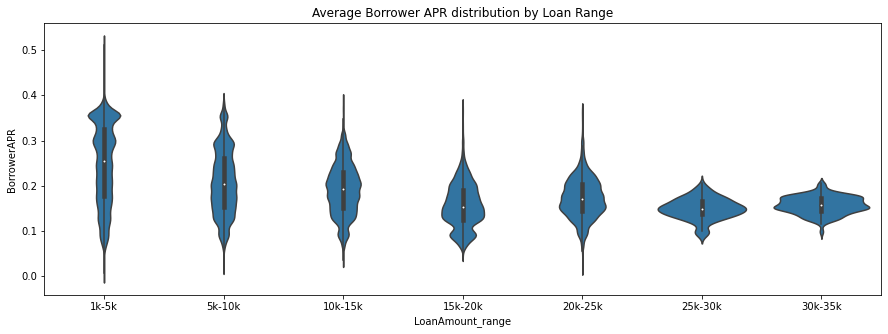

In [31]:
# using the .cut function to create a new column for loan amount range
df_loanData_copy['LoanAmount_range']= pd.cut(df_loanData_copy.LoanOriginalAmount,bins=[1000,5000,10000,15000,20000,25000,30000,35000],labels=['1k-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
plt.figure(figsize = [15, 5])
# plotting the violinplot
sb.violinplot(data = df_loanData_copy, x = 'LoanAmount_range', y = 'BorrowerAPR', color=colour);
plt.title('Average Borrower APR distribution by Loan Range');


## How is the Loan amount been distributed by the Term?

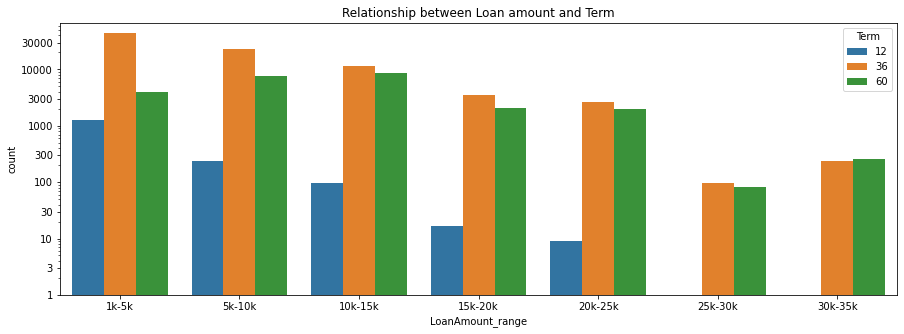

In [32]:
# using a count plot to get the distribution
plt.figure(figsize = [15, 5])
sb.countplot(data= df_loanData_copy, x='LoanAmount_range',hue='Term');
# setting the ticks since i am using the log scale
ticks = [ 1, 3, 10, 30, 100, 300, 1000,3000,10000,30000]
# setting the labels
labels = ['{}'.format(v) for v in ticks]
# setting the count scale to log
plt.yscale('log');
# ploting the count ticks
plt.yticks(ticks, labels);
plt.title('Relationship between Loan amount and Term');

## What is the relationship Between Income Range and Homeowner

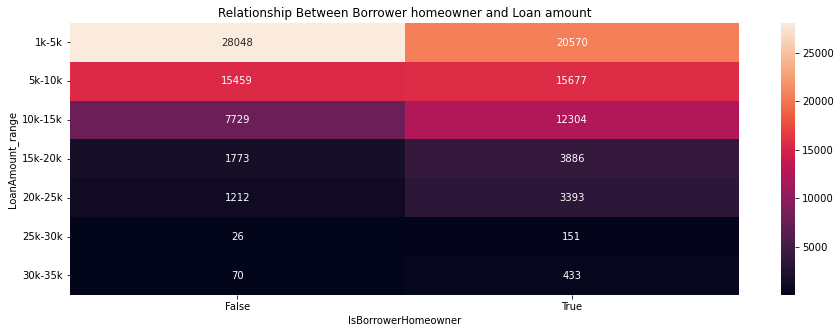

In [33]:
# first i use the group by statement to group the varaibles
group=df_loanData_copy.groupby(['LoanAmount_range','IsBorrowerHomeowner']).size()
# used the .index to set it into a data frame
group=group.reset_index(name='count')
# pivoted the data set
plt.figure(figsize = [15, 5])
group=group.pivot(index = 'LoanAmount_range', columns = 'IsBorrowerHomeowner', values = 'count')
# draw a heat map for the distribution
sb.heatmap(group,annot = True, fmt = 'd');
plt.title('Relationship Between Borrower homeowner and Loan amount');

- The distribution show that majority of the individals collect loans within 10k range below
- Also,within 15k above the borrowers who had homes dominated the disribution in collecting higher loans

## What are the correlations between BorrowerAPR, BorrowerRate, LoanOriginalAmount, and Prosper Score

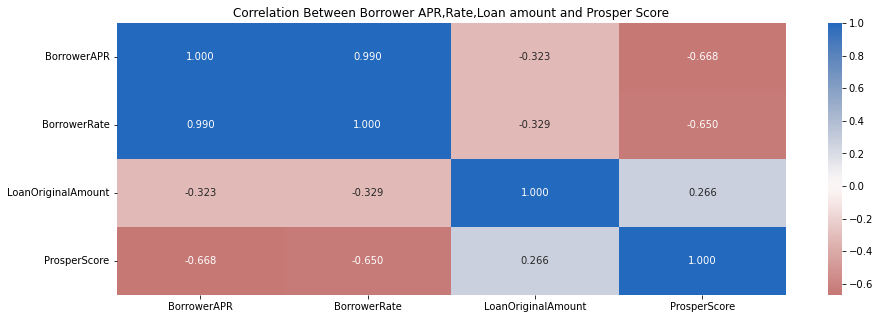

In [34]:
# seting all the column into a list
number_va=['BorrowerAPR','BorrowerRate','LoanOriginalAmount','ProsperScore']
# correlation plot
plt.figure(figsize = [15, 5])
sb.heatmap(df_loanData_copy[number_va].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Between Borrower APR,Rate,Loan amount and Prosper Score');

- The correlation coefficient indicate that the borrower rate and Apr have positive correlation meaning that the rise in one vale leads to the rise in the other

- The Loan amount is has a weak correlation with the borrowers rate and API.
- However, the Prosper Score shows a moderatly strong negative relationship with Borrower APR and Borrower rate

## What is the average borrower APR distribution by year ?

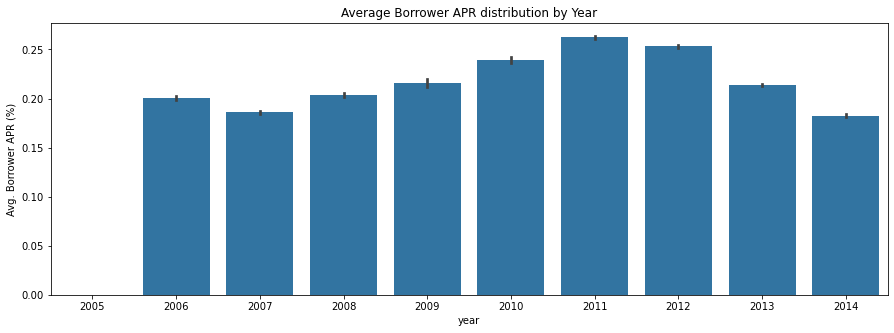

In [35]:
# creating a column for the years  form the loan original date column
df_loanData_copy['year']= df_loanData_copy['LoanOriginationDate'].dt.year
plt.figure(figsize = [15, 5])
# creating a bar plot to show the average borrower Apr distribution by year.
sb.barplot(data=df_loanData_copy, x = 'year', y = 'BorrowerAPR',color=colour);
plt.ylabel('Avg. Borrower APR (%)');
plt.title('Average Borrower APR distribution by Year');


- This distribution shows that 2006 had 0.2% with a slight fall to 2007 and a gradual increase till 2011 which was the highest APR % rate about 0.25%. A steady fall occurred from 2012 to 2014.

## What is the average borrower APR distribution by Month ?

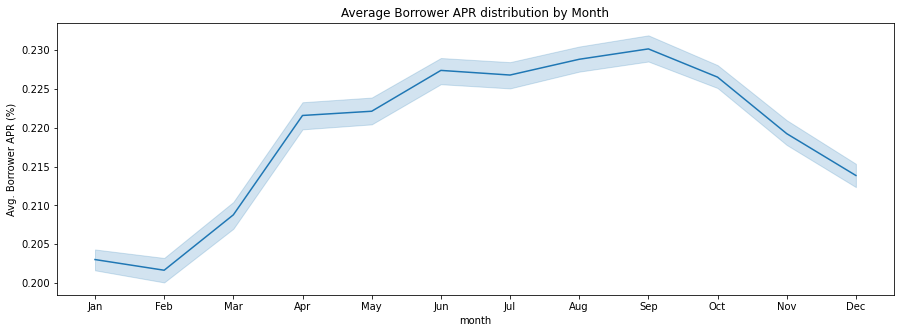

In [36]:
# creating month column
df_loanData_copy['month']= df_loanData_copy['LoanOriginationDate'].dt.strftime('%b')
# setting order categories by month
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
# ordering it into a categorical type data
set_m = pd.api.types.CategoricalDtype(ordered=True, categories=month)
# setting it into the prosper rating
df_loanData_copy['month'] = df_loanData_copy['month'].astype(set_m)
plt.figure(figsize = [15, 5])
# creating a line plot to show the distribution
sb.lineplot(data=df_loanData_copy,x='month',y='BorrowerAPR');
plt.ylabel('Avg. Borrower APR (%)');
plt.title('Average Borrower APR distribution by Month');

- The API had a gradual increase over the month with a steady decline from september to december


## BorrowerAPR distribution by Month


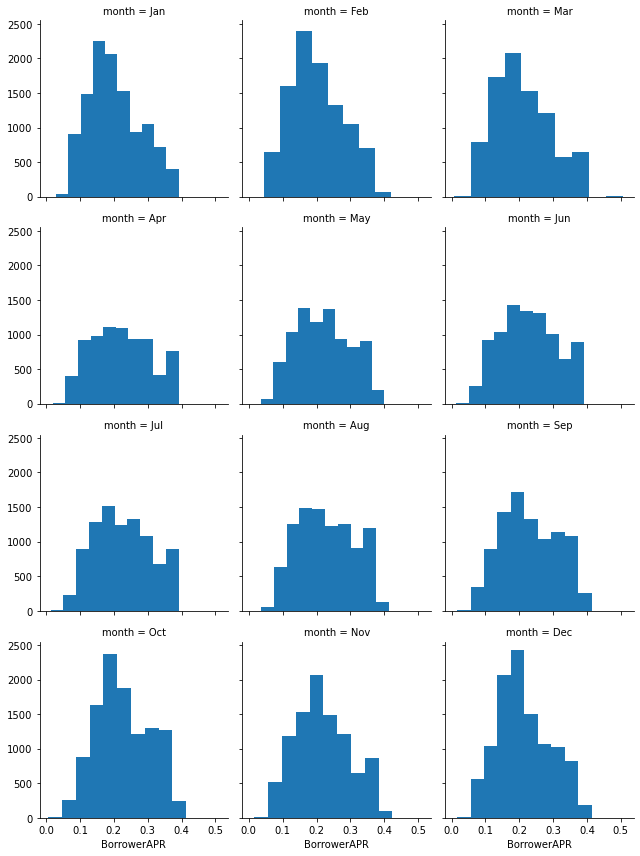

In [37]:
m=sb.FacetGrid(data=df_loanData_copy,col_wrap=3, col='month');
m.map(plt.hist,'BorrowerAPR');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- The distribution shows that the APR mean values were within the 0.2 range, with 2011 being the month with the highest APR rate. Also, the month with lower API shows a high borrower count and vice versa. However, there was not much correlation with the loan amount, and the majority of the homeowners dominated the amount range distribution.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- The majority of the loans were collected for 3 years and above. With a gradual increase in loan amount being collected, the borrower count decreased. However, the borrowers who had homes dominated the higher amount range of loan collected than those who did not.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.


## Does the term have a significance effect on the loan and APR

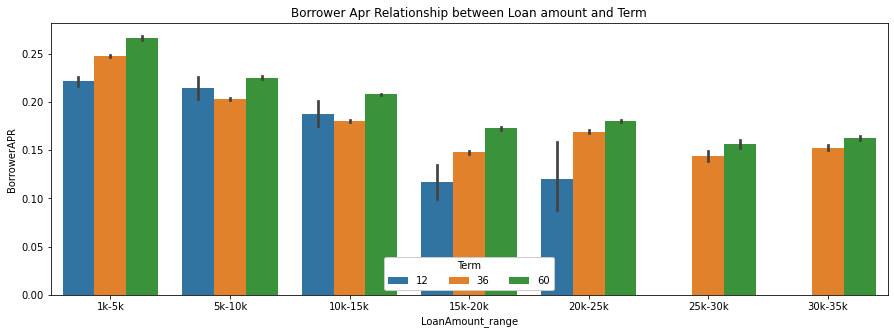

In [38]:
# creating a bar plot for the distribution
plt.figure(figsize = [15, 5])
yx=sb.barplot(data= df_loanData_copy, x = 'LoanAmount_range', y = 'BorrowerAPR',hue='Term');
yx.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Term');
plt.title("Borrower Apr Relationship between Loan amount and Term");

- The trend shows that the longer term(5 years) had higher borrower APR. which means the longer the term the individual collect the loan the higher their API gets.

## How does the Borrower APR affect the loan and Homeownership

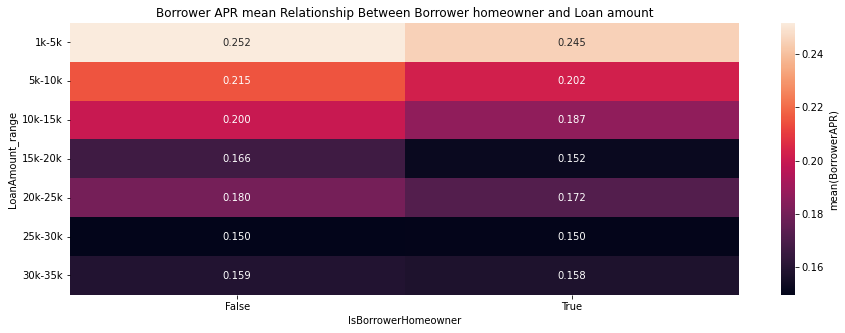

In [39]:
# adding the borrower APR to the chat
group=df_loanData_copy.groupby(['LoanAmount_range','IsBorrowerHomeowner']).mean()['BorrowerAPR']
group=group.reset_index(name='BorrowerAPR_mean')
group=group.pivot(index = 'LoanAmount_range', columns = 'IsBorrowerHomeowner', values = 'BorrowerAPR_mean')
plt.figure(figsize = [15, 5]);
sb.heatmap(group,annot = True, fmt = '.3f',cbar_kws = {'label' : 'mean(BorrowerAPR)'});
plt.title('Borrower APR mean Relationship Between Borrower homeowner and Loan amount');

- The borrowers APR had no effect on the home owner relationship. Although, the loan amount had an inverse relationship with borrower APR.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- The first multivariate showed that the higher the API, the lower the loan collected and the homeowner had no influence on the loan amount range. However, using the term shows the longer the term which loan was collected no matter the amount, the higher the APR gets.



### Were there any interesting or surprising interactions between features?

- The loan term had a significant effect on how higher the borrower's APR gets. Also, the lower the borrower APR, the higher the ratings.



## Conclusions

- To conclude, the borrower APR had the same trend as the Borrowers rate. From the exploration of the loan, the data set reveals that the higher the ratings, the lower the borrower's APR, and collecting loans for a longer period will increase their borrower's APR. Most loans were collected for 3 years and the borrowers APR mean where mostly within 0.2%. n addition, the homeowner distribution was almost even, and of the population who collected the highest loans, the homeowners dominated the range. Overall the borrower's APR will be crucial to consider when given out loans.